In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import dtw
import improved_dtw
import os
import pickle

from data_processing import DataIterator
from models import Autoregression

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from testing import TestFactory
p_dist = lambda p: lambda x, y: np.linalg.norm(x-y, ord=p)

Elapsed time: 8.317


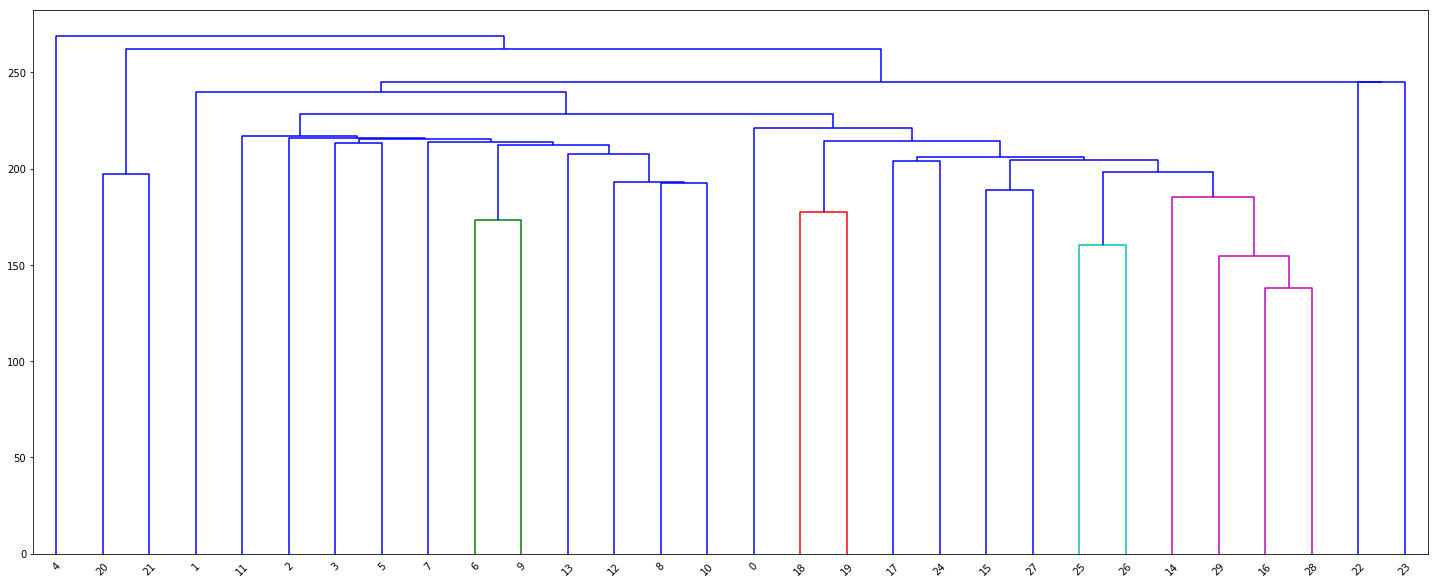

In [2]:
tests = TestFactory()
info = tests.test_dtw(dtw.dtw, p_dist(1))
info.visualize()

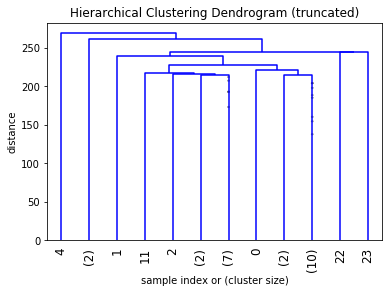

In [3]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    info.Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

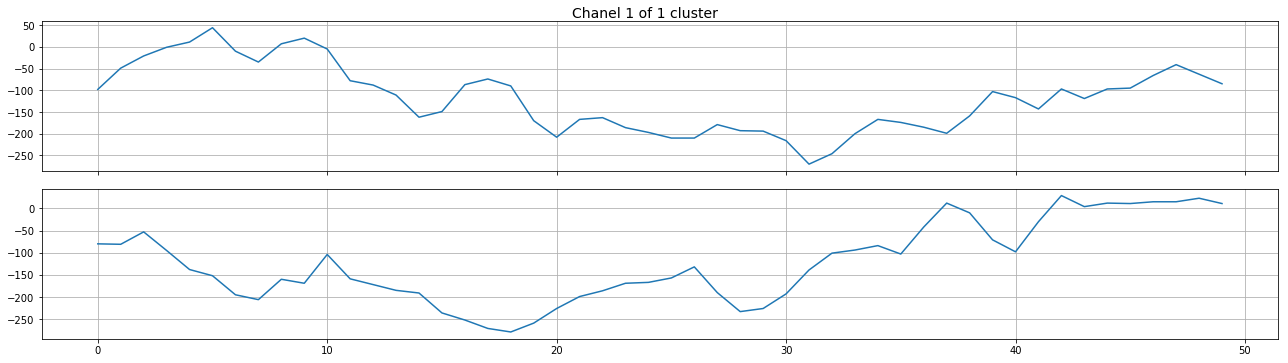

In [4]:
cluster_num = 3
clusters_labels = fcluster(info.Z, cluster_num, criterion='maxclust')
info.show_clustered(clusters_labels, label=1)

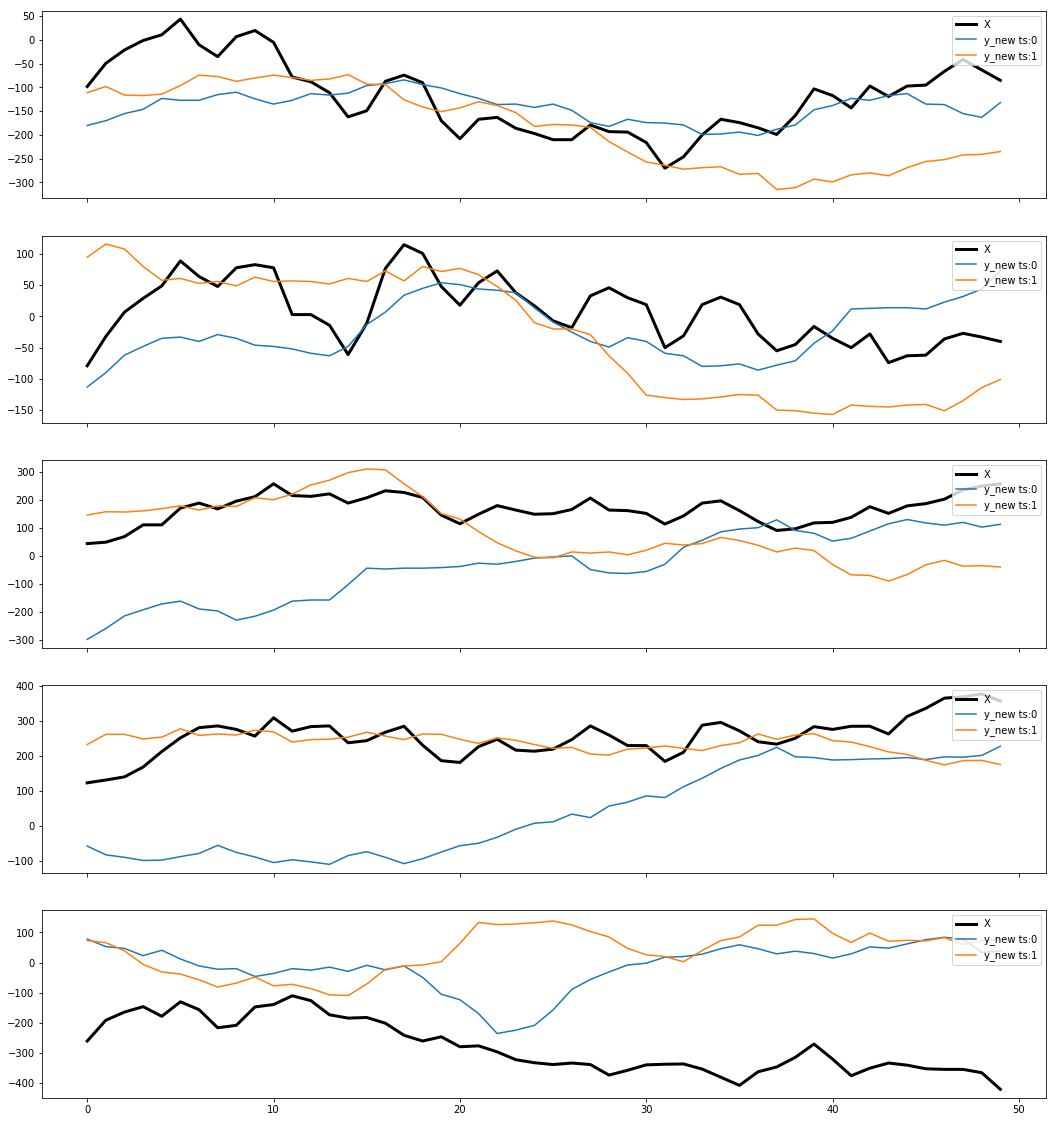

In [5]:
info.allignment_to_random(clusters_labels, label=1)

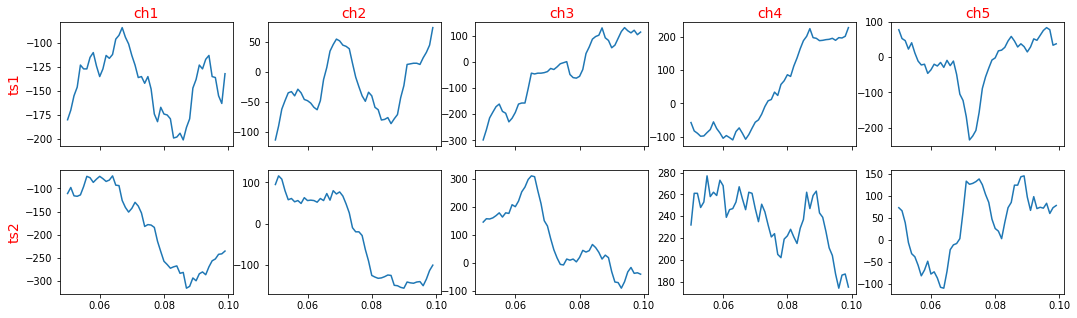

In [6]:
info.clusters_compare_table(clusters_labels, label=1)

## Рассмотрим ранее кластеризованный наборы

In [7]:
tests = TestFactory(random_state=42)
X = tests.set_sample(50)
result_linkages_files = os.listdir("../data/results/2/")

In [9]:
linkages = []
for file in result_linkages_files:
    with open("../data/results/2/{0}".format(file), 'rb') as f:
        linkages.append(pickle.load(f))

In [10]:
link = linkages[0]

In [11]:
cluster_num = 5
clusters_labels = fcluster(link, 10, criterion='maxclust')

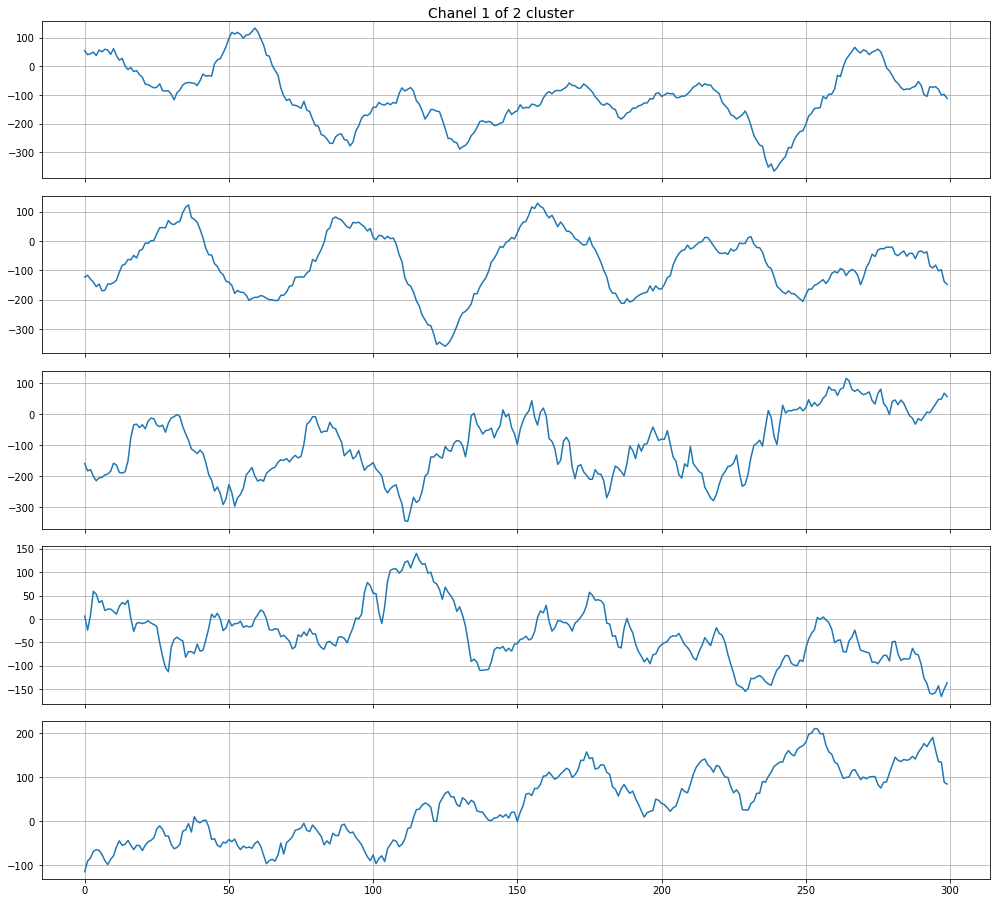

In [15]:
%matplotlib inline
tests.show_clustered(link, clusters_labels, label=2, max_num=5)

In [18]:
cluster_num = 3
clusters_labels = fcluster(info.Z, cluster_num, criterion='maxclust')
info.show_clustered(clusters_labels, label=1)

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,
        1,  1,  3,  8,  2,  2,  2,  6,  2,  2,  2,  2,  2,  2,  9,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 10,  7,  1,  2,  5],
      dtype=int32)